## 七月在线机器学习集训营八期第二周(Pandas数据处理)考试
#### 考试说明:
- 起止时间：请同学在2019年05月17日至05月20日期间完成，最晚提交时间下周一（05月20日12:00时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试提交方式：请同学<font color=red><b>拷贝</b></font>该试卷后，将文件更名为同学姓名拼音-exam1（例如wangwei-exam2）后，移动至/0.Teacher/Exam/2/目录下进行作答。
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分处不用填写

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config ZMQInteractiveShell.ast_node_interactivity='all' 

- 同学姓名：王迪
- 批改人：   
- 最终得分:

<center><h1>####答卷开始####</h1></center>
***

## Pandas操作题(共两题。每题每个步骤分数均已标明。总分100分)

### 1.学生数据分析（总分数：60）

#### 1.数据导入并展示, 文件位置位于0.Teacher/data/下（10分）
   - 请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（5分）   
   - 请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（5分）

#### 2.把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (5分）

In [2]:
df_info = pd.read_csv(r"../../Data/student-info.csv", sep=";")
df_score = pd.read_csv(r"../../Data/student-score.csv", sep=";")
df = pd.merge(df_info, df_score, on=["ID"])
df.head()
df.shape

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


(395, 34)

#### 3.把"df"所有的列展示出来(5分)

In [3]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### 4.统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [4]:
df_sex = df.groupby(by=["sex"]).agg({
    "G1": np.mean,
    "G2": np.mean,
    "G3": np.mean
})
df_sex

,G3,G1,G2
sex,,,
F,9.966346,10.620192,10.389423
M,10.914439,11.229947,11.074866


#### 5.统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

In [5]:
df_age = df.groupby(by=["age"]).agg({
    "G1": np.mean,
    "G2": np.mean,
    "G3": np.mean
})
df_age

,G3,G1,G2
age,,,
15,11.256098,11.231707,11.365854
16,11.028846,10.942308,11.182692
17,10.275510,10.897959,10.479592
18,9.548780,10.719512,10.134146
19,8.208333,10.250000,9.250000
20,14.000000,13.666667,13.666667
21,7.000000,10.000000,8.000000
22,8.000000,6.000000,8.000000


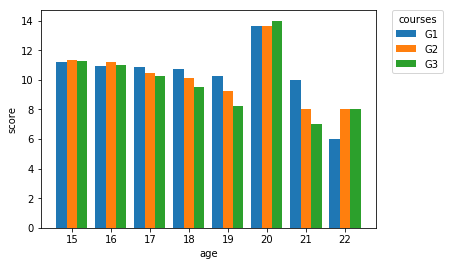

In [6]:
def draw(df):
    x = df.index
    total_width, n = 0.8, 3
    width = total_width / n
    plt.bar(x - width, df.G1, width=width, label='G1')
    plt.bar(x, df.G2, width=width, label='G2')
    plt.bar(x + width, df.G3, width=width, label='G3')
    plt.xlabel("age")
    plt.ylabel("score")
    plt.legend(title="courses",
               bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0.)


draw(df_age)

#### 6.统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

school,GP,MS
G1,10.939828,10.673913
G2,10.782235,10.195652
G3,10.489971,9.847826


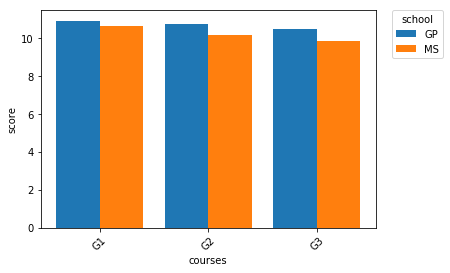

In [7]:
# df.school.value_counts()

df_school = df.groupby(by=["school"]).agg({
    "G1": np.mean,
    "G2": np.mean,
    "G3": np.mean
})
df_school_new = df_school.T.sort_index()
df_school_new


def draw(df):
    names = df.index
    df = df.reset_index()
    x = df.index
    total_width, n = 0.8, 2
    width = total_width / n

    plt.bar(x - width / 2, df.GP, width=width, label='GP')
    plt.bar(x + width / 2, df.MS, width=width, label='MS')
    #     plt.bar(x + width, df.G3, width=width, label='G3')
    plt.xticks(x, names, rotation=45)
    plt.xlabel("courses")
    plt.ylabel("score")
    plt.legend(title="school",
               bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0.)


draw(df_school_new)
# df_school.index

#### 7.统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(10分)

In [8]:
# from pprint import pprint

df["total"] = df.G1 + df.G2 + df.G3
grouped = df.groupby(by=["school"])
dct = {}
for school, dg in grouped:
    dg_top10 = dg.sort_values(by=["total"], ascending=False).iloc[:10]
    dct[school] = dg_top10.to_dict(orient="records")

for key, lst in dct.items():
    for idx, i in enumerate(lst):
        print(key + ": No." + str(idx + 1) + "  " + str(i))

GP: No.1  {'Pstatus': 'T', 'Dalc': 1, 'schoolsup': 'no', 'Fedu': 3, 'traveltime': 1, 'studytime': 4, 'guardian': 'mother', 'paid': 'no', 'Fjob': 'services', 'address': 'U', 'age': 16, 'Walc': 1, 'G3': 20, 'famsize': 'GT3', 'school': 'GP', 'total': 58, 'ID': 47, 'failures': 0, 'reason': 'reputation', 'higher': 'yes', 'G1': 19, 'famrel': 4, 'Medu': 4, 'activities': 'yes', 'absences': 4, 'internet': 'yes', 'freetime': 2, 'goout': 2, 'famsup': 'no', 'G2': 19, 'romantic': 'no', 'sex': 'M', 'nursery': 'yes', 'health': 2, 'Mjob': 'health'}
GP: No.2  {'Pstatus': 'T', 'Dalc': 1, 'schoolsup': 'no', 'Fedu': 2, 'traveltime': 1, 'studytime': 1, 'guardian': 'mother', 'paid': 'no', 'Fjob': 'other', 'address': 'U', 'age': 15, 'Walc': 1, 'G3': 19, 'famsize': 'LE3', 'school': 'GP', 'total': 56, 'ID': 113, 'failures': 0, 'reason': 'course', 'higher': 'yes', 'G1': 18, 'famrel': 3, 'Medu': 4, 'activities': 'no', 'absences': 10, 'internet': 'yes', 'freetime': 5, 'goout': 2, 'famsup': 'no', 'G2': 19, 'romant

### 2.沃尔玛销售数据整理（共40分）

#### 1. 数据导入并展示, 文件位置位于0.Teacher/data/walmart下 （10分）

   - 请将文件 stores.csv 中的内容读入pandas DataFrame "df_stores"，并展示前五行以及打印df_stores的shape （2分）

In [9]:
df_stores = pd.read_csv(r"../../Data/Walmart/stores.csv")
df_stores.head()
df_stores.shape

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


(45, 3)

   - 请将文件 features.csv 中的内容读入pandas DataFrame "df_feats"，将df_feats改成只留下以下几个columns: "Store", "Date", "Temperature", "Fuel_Price", "CPI", "Unemployment", 并展示前五行以及打印df_feats的shape  （4分）

In [10]:
df_feats = pd.read_csv(r"../../Data/Walmart/features.csv")
df_feats = df_feats[["Store", "Date", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
df_feats.head()
df_feats.shape

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,211.096358,8.106
1,1,2010-02-12,38.51,2.548,211.242170,8.106
2,1,2010-02-19,39.93,2.514,211.289143,8.106
3,1,2010-02-26,46.63,2.561,211.319643,8.106
4,1,2010-03-05,46.50,2.625,211.350143,8.106


(8190, 6)

   - 请将文件 sales.csv 中的内容读入pandas DataFrame "df_sales"，并展示前五行以及打印df_sales的shape（4分）

In [11]:
df_sales = pd.read_csv(r"../../Data/Walmart/sales.csv")
df_sales.head()
df_sales.shape

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


(421570, 5)

#### 8. 我们发现 df_sales 中每个Store有很多个Dept(department)， 我们只关心整家店的销售情况，所以请把这张表格按照Store和Date来计算整店销售总额，IsHoliday这一列不必保留。结果保存在df_sales_by_store中。（10分）

In [12]:
df_sales_by_store = df_sales.groupby(by=["Store","Date"])["Weekly_Sales"].sum().reset_index()
df_sales_by_store.head()
df_sales_by_store.shape

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


(6435, 3)

#### 9. 使用 Store 和 Date 这两列合并 df_sales_by_store 和 df_feats 两张表格，结果保存在 df_sale_feats 。（10分）

In [13]:
# df_feats.head()
df_sale_feats = pd.merge(df_feats, df_sales_by_store, on=["Store", "Date"])
df_sale_feats.head()
df_sale_feats.shape

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,2010-02-05,42.31,2.572,211.096358,8.106,1643690.90
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1641957.44
2,1,2010-02-19,39.93,2.514,211.289143,8.106,1611968.17
3,1,2010-02-26,46.63,2.561,211.319643,8.106,1409727.59
4,1,2010-03-05,46.50,2.625,211.350143,8.106,1554806.68


(6435, 7)

#### 10. 使用 Store 这一列合并 df_sale_feats 和 df_stores 两张表格，结果仍然保留在df_sale_feats 中。（10分）

In [14]:
df_sale_feats = pd.merge(df_sale_feats, df_stores, how="left", on=["Store"])
df_sale_feats.head()
df_sale_feats.shape

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,1643690.90,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1641957.44,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,1611968.17,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,1409727.59,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,1554806.68,A,151315


(6435, 9)

***
<center><h1>####答卷结束####</h1></center>

### 本周课程意见反馈(非必答)
请同学围绕以下两点进行回答：
- 自身总结：您自己在本周课程的学习，收获，技能掌握等方面进行总结，包括自身在哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。
- 课程反馈：也可以就知识点，进度，难易度，教学方式，考试方式等等进行意见反馈，督促我们进行更有效的改进，为大家提供更优质的服务。